<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
TensorFlow Version :1.15.0
Matplotlib Version :3.1.1


In [53]:
# Logistic regression : Binary Classification data
x_input = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
print(x_input.shape)

# labels = np.array([ [0], [0], [0], [1] ])   # and
# labels = np.array([ [0], [1], [1], [1] ])   # or
# labels = np.array([ [1], [1], [1], [0] ])   # nand
# labels = np.array([ [1], [0], [0], [0] ])   # nor
labels = np.array([ [0], [1], [1], [0] ])   # xor
print(labels.shape)

(4, 2)
(4, 1)


In [0]:
# placeholder
x_ph = tf.placeholder(tf.float32, (None, 2), name="input")
labels_ph = tf.placeholder(tf.float32, (None, 1), name="target")

In [0]:
# Weight, Bias
w = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32, name="weight")
b = tf.Variable(tf.random.normal((1, 1)), dtype=tf.float32, name="bias")


In [0]:
# Hypothesis, Cost
hypothesis = tf.sigmoid(tf.matmul(x_ph ,w) + b)
cost = -tf.reduce_mean(labels_ph * tf.log(hypothesis) + (1 - labels_ph) * tf.log(1 - hypothesis))

In [0]:
learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

In [0]:
N_training = 100000
training_idx = np.arange(0, N_training+1, 1)
cost_graph = np.zeros(N_training+1)
check = np.array([0, 1000, 8000, 20000, 40000, N_training])
w_trained = []
b_trained = []
check_idx = 0

In [59]:
%%time
# 학습 (Training)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for cnt_training in range(1, N_training+1):
    _, cost_res, w_res, b_res = sess.run((train, cost, w, b), feed_dict={x_ph: x_input, labels_ph: labels})
    cost_graph[cnt_training-1] = cost_res
    if check[check_idx] == cnt_training-1:
        w_trained.append(w_res)
        b_trained.append(b_res)
        check_idx += 1
    if cnt_training % 1000 == 1:
        print("[{:>5}] cost = {:>10.4}, w = [[{:>7.4}] [{:>7.4}]], b = [[{:>7.4}]]".format(cnt_training-1, cost_graph[cnt_training-1], w_res[0][0], w_res[1][0], b_res[0][0]))

cost_res, w_res, b_res = sess.run((cost, w, b), feed_dict={x_ph: x_input, labels_ph: labels})
cost_graph[cnt_training-1] = cost_res
w_trained.append(w_res)
b_trained.append(b_res)
print("[{:>5}] cost = {:>10.4}, w = [[{:>7.4}] [{:>7.4}]], b = [[{:>7.4}]]".format(N_training, cost_graph[N_training], w_res[0][0], w_res[1][0], b_res[0][0]))


[    0] cost =     0.9348, w = [[ 0.5498] [-0.8915]], b = [[ -1.199]]
[ 1000] cost =     0.7066, w = [[ 0.6115] [-0.1994]], b = [[-0.2781]]
[ 2000] cost =     0.6976, w = [[ 0.3651] [-0.07108]], b = [[-0.1753]]
[ 3000] cost =     0.6947, w = [[ 0.2164] [-0.01733]], b = [[-0.1182]]
[ 4000] cost =     0.6937, w = [[ 0.1299] [0.004692]], b = [[-0.07981]]
[ 5000] cost =     0.6934, w = [[0.07894] [0.01195]], b = [[-0.05391]]
[ 6000] cost =     0.6932, w = [[0.04862] [0.01277]], b = [[-0.03641]]
[ 7000] cost =     0.6932, w = [[0.03033] [0.01114]], b = [[-0.02459]]
[ 8000] cost =     0.6932, w = [[0.01914] [0.008871]], b = [[-0.01661]]
[ 9000] cost =     0.6932, w = [[0.01221] [0.006712]], b = [[-0.01122]]
[10000] cost =     0.6932, w = [[0.00786] [0.004919]], b = [[-0.007579]]
[11000] cost =     0.6931, w = [[0.005102] [0.003529]], b = [[-0.005119]]
[12000] cost =     0.6931, w = [[0.003336] [0.002494]], b = [[-0.003457]]
[13000] cost =     0.6931, w = [[0.002194] [0.001743]], b = [[-0.002

In [60]:
# Training 상황에 대한 그래프 출력
print("[Training Test]")
y = sess.run(hypothesis, feed_dict={x_ph:x_input})
y = y.reshape((-1,))
Y = [int(y_elem>0.5) for y_elem in y]
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2}(y:{:>5.2})".format(x_input[idx], labels[idx], Y[idx], y[idx]))

[Training Test]
Input [0 0] , Target : [0] => Y : 0(y:  0.5)
Input [0 1] , Target : [1] => Y : 0(y:  0.5)
Input [1 0] , Target : [1] => Y : 0(y:  0.5)
Input [1 1] , Target : [0] => Y : 0(y:  0.5)


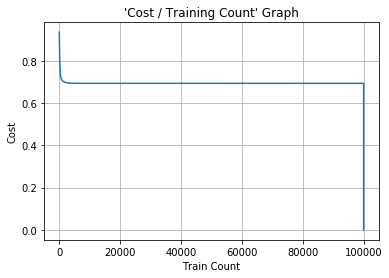

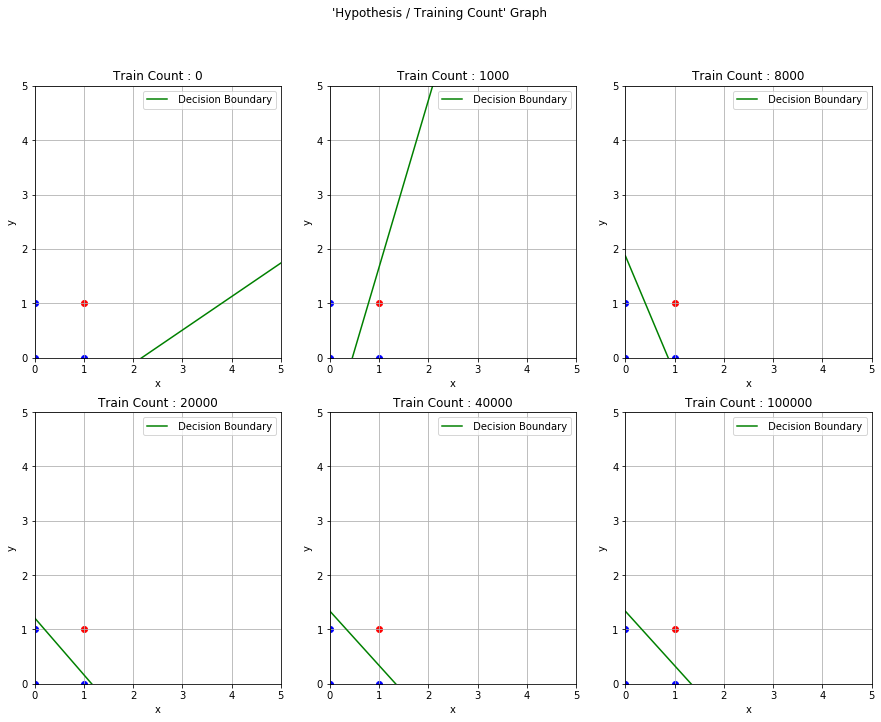

In [61]:
# Training 상황에 대한 그래프 출력
# 1)Training 회수 별 Cost 값
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(training_idx, cost_graph)
ax_cost.set_title("'Cost / Training Count' Graph")
ax_cost.set_xlabel("Train Count")
ax_cost.set_ylabel("Cost")
ax_cost.grid(True)


# 2) 구분선 그려넣을 계획
x_decision = np.linspace(0, 5, 1000)
x_col = x_input[:, 0]
x_row = x_input[:, 1]
fig_hypothesis, ax_hypothesis = plt.subplots(2, 3, figsize=(15, 11))
fig_hypothesis.suptitle("'Hypothesis / Training Count' Graph")
for ax_idx in range(check.size):
    w = w_trained[ax_idx]
    b = b_trained[ax_idx]
    y_decision = -(w[0][0] * x_decision + b[0][0])/w[1][0] 
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col[:3], x_row[:3], color='blue')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col[3:], x_row[3:], color='red')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].plot(x_decision, y_decision, label=' Decision Boundary', color='green')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_title("Train Count : {}".format(check[ax_idx]))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlim((0, 5))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylim((0, 5))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlabel("x")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylabel("y")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].grid(True)
    ax_hypothesis[ax_idx // 3][ax_idx % 3].legend()

plt.show()